Инициализируем нужные импорты

In [3]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=82a6826ba3352bedc6f8490441b4d0adf62c76429d8e8436df72e0eeb73295aa
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [184]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import pymorphy2
import matplotlib.pyplot as plt

morph = pymorphy2.MorphAnalyzer()

Загружаем данные из нашего датасета

In [173]:
df = pd.read_csv('film_dataset.csv',
                     sep=',',
                     engine='python')

Печатаем информацию о загруженных данных

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         95 non-null     object 
 1   link         95 non-null     object 
 2   year         95 non-null     int64  
 3   country      95 non-null     object 
 4   rating       35 non-null     float64
 5   scoreCount   38 non-null     object 
 6   category     95 non-null     object 
 7   description  57 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ KB


Выводим первые 10 строк

In [125]:
df.head(10)

,name,link,year,country,rating,scoreCount,category,description
0,Всё везде и сразу,/film/1322324/,2021,США,7.3,302 154,Лучшие фильмы-2022 по версии редакции,В жизни Эвелин царит бардак. Она никак не може...
1,Сядь за руль моей машины,/film/4382259/,2021,Япония,7.3,26 331,Лучшие фильмы-2022 по версии редакции,Режиссёра Юсукэ приглашают поставить «Дядю Ва...
2,Лакричная пицца,/film/1320623/,2021,США,7.1,44 768,Лучшие фильмы-2022 по версии редакции,"1973 год, долина Сан-Фернандо. Гэри всего 15 л..."
3,Решение уйти,/film/1435399/,2022,Корея Южная,7.1,24 577,Лучшие фильмы-2022 по версии редакции,"Детектив расследует смерть мужчины, упавшего с..."
4,Камон Камон,/film/1309501/,2021,США,7.6,19 975,Лучшие фильмы-2022 по версии редакции,Радиожурналист вместе с маленьким племянником ...
5,Нет,/film/1447137/,2022,США,6.3,27 373,Лучшие фильмы-2022 по версии редакции,Через полгода после смерти отца в результате н...
6,Три тысячи лет желаний,/film/1209527/,2022,Австралия,7.3,244 885,Лучшие фильмы-2022 по версии редакции,NaN
7,Блондинка,/film/525530/,2022,США,6.1,16 560,Лучшие фильмы-2022 по версии редакции,"В те редкие часы, когда сбрендившая мама не пы..."
8,На Западном фронте без перемен,/film/316376/,2022,Германия,7.6,34 080,Лучшие фильмы-2022 по версии редакции,"Германская империя, 1917 год. Преисполненные п..."
9,RRR: Рядом ревёт революция,/film/1115117/,2022,Индия,8.0,74 063,Лучшие фильмы-2022 по версии редакции,Британская Индия. Рама — преданный полицейский...


 Приведем scoreCount к int

In [175]:
def save_str_to_int(text) -> int:
  try:
    return int(text.replace(' ',''), base=10)
  except Exception as e:
    return 0  
   

In [176]:
df['scoreCount'] = df.apply(lambda row: save_str_to_int(row['scoreCount']), axis=1)

In [134]:
df.head(10)

,name,link,year,country,rating,scoreCount,category,description
0,Всё везде и сразу,/film/1322324/,2021,США,7.3,302154,Лучшие фильмы-2022 по версии редакции,В жизни Эвелин царит бардак. Она никак не може...
1,Сядь за руль моей машины,/film/4382259/,2021,Япония,7.3,26331,Лучшие фильмы-2022 по версии редакции,Режиссёра Юсукэ приглашают поставить «Дядю Ва...
2,Лакричная пицца,/film/1320623/,2021,США,7.1,44768,Лучшие фильмы-2022 по версии редакции,"1973 год, долина Сан-Фернандо. Гэри всего 15 л..."
3,Решение уйти,/film/1435399/,2022,Корея Южная,7.1,24577,Лучшие фильмы-2022 по версии редакции,"Детектив расследует смерть мужчины, упавшего с..."
4,Камон Камон,/film/1309501/,2021,США,7.6,19975,Лучшие фильмы-2022 по версии редакции,Радиожурналист вместе с маленьким племянником ...
5,Нет,/film/1447137/,2022,США,6.3,27373,Лучшие фильмы-2022 по версии редакции,Через полгода после смерти отца в результате н...
6,Три тысячи лет желаний,/film/1209527/,2022,Австралия,7.3,244885,Лучшие фильмы-2022 по версии редакции,NaN
7,Блондинка,/film/525530/,2022,США,6.1,16560,Лучшие фильмы-2022 по версии редакции,"В те редкие часы, когда сбрендившая мама не пы..."
8,На Западном фронте без перемен,/film/316376/,2022,Германия,7.6,34080,Лучшие фильмы-2022 по версии редакции,"Германская империя, 1917 год. Преисполненные п..."
9,RRR: Рядом ревёт революция,/film/1115117/,2022,Индия,8.0,74063,Лучшие фильмы-2022 по версии редакции,Британская Индия. Рама — преданный полицейский...


 Попробуем найти корреляцию кол-ва оценок (scoreCount) в зависимости от кол-ва прилагательных и  (то есть на сколько выразительный текст) в описании фильма

In [177]:
def get_adj_count(text) -> int:
  result = 0

  if text is not None and type(text) is str:
    for word in text.split(" "):
      p = morph.parse(word)[0]

      if p.tag.POS == 'ADJF' or p.tag.POS == 'ADJS':
        result=result+1

  return result


Добавим новое поле - adjectives_count, путем вычисления через метод get_adj_count

In [178]:
df['adjectives_count'] = df.apply(lambda row: get_adj_count(row['description']), axis=1)

Выведем первые 10 строк, посмотрим на новое поле - кол-во прилагательных

In [160]:
df.head(10)

,name,link,year,country,rating,scoreCount,category,description,adjectives_count
0,Всё везде и сразу,/film/1322324/,2021,США,7.3,302154,Лучшие фильмы-2022 по версии редакции,В жизни Эвелин царит бардак. Она никак не може...,13
1,Сядь за руль моей машины,/film/4382259/,2021,Япония,7.3,26331,Лучшие фильмы-2022 по версии редакции,Режиссёра Юсукэ приглашают поставить «Дядю Ва...,7
2,Лакричная пицца,/film/1320623/,2021,США,7.1,44768,Лучшие фильмы-2022 по версии редакции,"1973 год, долина Сан-Фернандо. Гэри всего 15 л...",11
3,Решение уйти,/film/1435399/,2022,Корея Южная,7.1,24577,Лучшие фильмы-2022 по версии редакции,"Детектив расследует смерть мужчины, упавшего с...",3
4,Камон Камон,/film/1309501/,2021,США,7.6,19975,Лучшие фильмы-2022 по версии редакции,Радиожурналист вместе с маленьким племянником ...,2
5,Нет,/film/1447137/,2022,США,6.3,27373,Лучшие фильмы-2022 по версии редакции,Через полгода после смерти отца в результате н...,4
6,Три тысячи лет желаний,/film/1209527/,2022,Австралия,7.3,244885,Лучшие фильмы-2022 по версии редакции,NaN,0
7,Блондинка,/film/525530/,2022,США,6.1,16560,Лучшие фильмы-2022 по версии редакции,"В те редкие часы, когда сбрендившая мама не пы...",10
8,На Западном фронте без перемен,/film/316376/,2022,Германия,7.6,34080,Лучшие фильмы-2022 по версии редакции,"Германская империя, 1917 год. Преисполненные п...",5
9,RRR: Рядом ревёт революция,/film/1115117/,2022,Индия,8.0,74063,Лучшие фильмы-2022 по версии редакции,Британская Индия. Рама — преданный полицейский...,12


Отфильтруем фильмы без кол-ва очков и рейтинга

In [179]:
df = df.query("scoreCount > 0 and rating > 0")

Отсортируем по нашей метрике и кол-ву оценок

In [181]:
df = df.sort_values(by=['adjectives_count', 'scoreCount'], ascending=False)

Выведем первые 10 строк

In [183]:
df.head(10)

,name,link,year,country,rating,scoreCount,category,description,adjectives_count
19,Худший человек на свете,/film/4479538/,2021,Норвегия,7.4,18067,Лучшие фильмы-2022 по версии редакции,Юная студентка Юлия из хорошей норвежской семь...,19
0,Всё везде и сразу,/film/1322324/,2021,США,7.3,302154,Лучшие фильмы-2022 по версии редакции,В жизни Эвелин царит бардак. Она никак не може...,13
61,Клипмейкеры,/film/4534033/,2022,Россия,6.2,1630,Цифровые релизы,Молодой московский клипмейкер Гриша прокладыва...,13
9,RRR: Рядом ревёт революция,/film/1115117/,2022,Индия,8.0,74063,Лучшие фильмы-2022 по версии редакции,Британская Индия. Рама — преданный полицейский...,12
10,Преступления будущего,/film/4440349/,2022,Канада,5.7,18097,Лучшие фильмы-2022 по версии редакции,Недалекое будущее. У людей появился синдром ус...,12
2,Лакричная пицца,/film/1320623/,2021,США,7.1,44768,Лучшие фильмы-2022 по версии редакции,"1973 год, долина Сан-Фернандо. Гэри всего 15 л...",11
18,Падение Луны,/film/988816/,2022,США,5.4,56813,Лучшие фильмы-2022 по версии редакции,В 2011 году во время рядового ремонта спутника...,10
7,Блондинка,/film/525530/,2022,США,6.1,16560,Лучшие фильмы-2022 по версии редакции,"В те редкие часы, когда сбрендившая мама не пы...",10
23,Оторви и выбрось,/film/1251147/,2021,Россия,6.4,24454,Лучшие фильмы-2022 по версии редакции,От любящей родни не уйдешь. Суровая Вера Павло...,9
49,Иван Царевич и Серый Волк 5,/film/5101781/,2022,Россия,5.9,3425,Цифровые релизы,"Была у Ивана с Василисой не жизнь, а сказка. Б...",9


Построим график и посмотрим зависисмость кол-ва прилагательных от кол-ва оценок

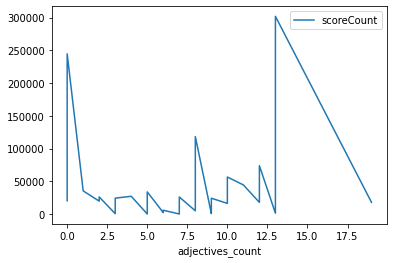

In [191]:
df.plot(x = 'adjectives_count', y = 'scoreCount')